# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.metrics as skm

<hr style="border:2px solid black"> </hr>

# Obtain dataset

In [2]:
# the data is already shuffled
fashion = keras.datasets.fashion_mnist
(Xtrain,ytrain),(Xtest,ytest)=fashion.load_data()
ISize = Xtrain.shape[1:]
print(ISize)

(28, 28)


### All the classes

In [3]:
print(np.unique(ytrain))

[0 1 2 3 4 5 6 7 8 9]


### Plot a image from the dataset

9


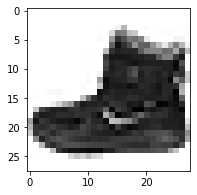

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(Xtrain[0],cmap='binary')
print(ytrain[0])

0


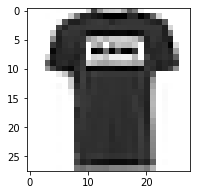

In [5]:
plt.figure(figsize=(3,3))
plt.imshow(Xtrain[1],cmap='binary')
print(ytrain[1])

3


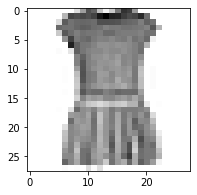

In [32]:
plt.figure(figsize=(3,3))
plt.imshow(Xtrain[3],cmap='binary')
print(ytrain[3])

2


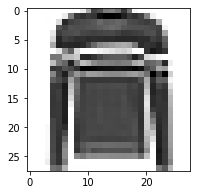

In [34]:
plt.figure(figsize=(3,3))
plt.imshow(Xtrain[5],cmap='binary')
print(ytrain[5])

## Converts all the data into binary classification

The data will be:
- t-shirts
- boots

In [6]:
searchval1 = 0
searchval2 = 9

indexes1 = np.where(ytrain == searchval1)[0]
indexes2 = np.where(ytrain == searchval2)[0]

indexes3 = np.where(ytest == searchval1)[0]
indexes4 = np.where(ytest == searchval2)[0]

XtrainBin = []
ytrainBin = []

for index in indexes1:
    XtrainBin.append(Xtrain[index])
    ytrainBin.append(0)
    
for index in indexes2:
    XtrainBin.append(Xtrain[index])
    ytrainBin.append(1)
    
XtrainBin = np.array(XtrainBin)
ytrainBin = np.array(ytrainBin).astype(int)


XtestBin = []
ytestBin = []

for index in indexes3:
    XtestBin.append(Xtest[index])
    ytestBin.append(0)
    
for index in indexes4:
    XtestBin.append(Xtest[index])
    ytestBin.append(1)
    
XtestBin = np.array(XtestBin)
ytestBin = np.array(ytestBin).astype(int)


print(XtrainBin.shape)
print(ytrainBin.shape)
print(XtestBin.shape)
print(ytestBin.shape)

(12000, 28, 28)
(12000,)
(2000, 28, 28)
(2000,)


### Shuffle the data

In [7]:
# test with xor shuffled 
indexes = np.arange(ytrainBin.shape[0])
np.random.shuffle(indexes)

XtrainBinShuffled = np.zeros(XtrainBin.shape)
ytrainBinShuffled = np.zeros(ytrainBin.shape[0]).astype(int)

for index in range(indexes.shape[0]):
    XtrainBinShuffled[index] = XtrainBin[indexes[index]]
    ytrainBinShuffled[index] = int(ytrainBin[indexes[index]])
    

indexes = np.arange(XtestBin.shape[0])
np.random.shuffle(indexes)

XtestBinShuffled = np.zeros(XtestBin.shape)
ytestBinShuffled = np.zeros(ytestBin.shape[0]).astype(int)

for index in range(indexes.shape[0]):
    XtestBinShuffled[index] = XtestBin[indexes[index]]
    ytestBinShuffled[index] = ytestBin[indexes[index]]
    


XtrainBin = XtrainBinShuffled
ytrainBin = ytrainBinShuffled
XtestBin = XtestBinShuffled
ytestBin = ytestBinShuffled
    
print(XtrainBin.shape)
print(ytrainBin.shape)
print(XtestBin.shape)
print(ytestBin.shape)

(12000, 28, 28)
(12000,)
(2000, 28, 28)
(2000,)


1
0
0
0
0
1
1
0
0
0


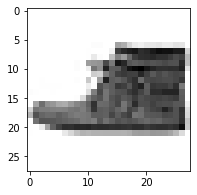

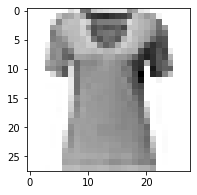

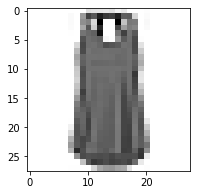

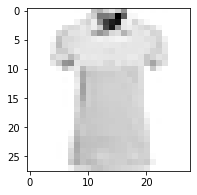

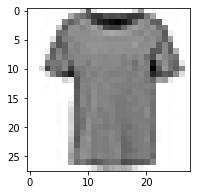

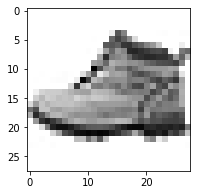

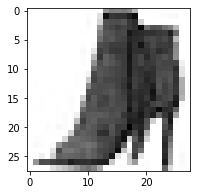

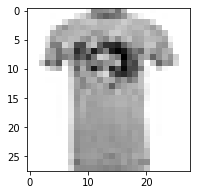

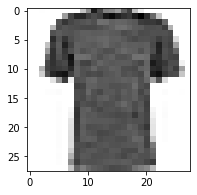

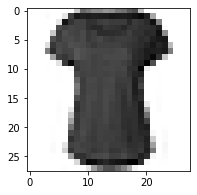

In [8]:
for i in range(10):
    plt.figure(figsize=(3,3))
    plt.imshow(XtrainBin[i],cmap='binary')
    print(ytrainBin[i])

<hr style="border:2px solid black"> </hr>

# Tests

### Functions to plot the graphics

In [9]:
def get_train_history(train):
    h=train.history
    h.keys()
    plt.figure(figsize=(10,5))
    plt.plot(h['accuracy'], label='Accuracy_train')
    plt.plot(h['loss'], label='Loss_train')

    plt.legend()
    plt.grid()
    plt.show()

In [10]:
def get_train_val_history(train):
    h=train.history
    h.keys()
    plt.figure(figsize=(10,5))
    plt.plot(h['val_loss'], label='Loss_val')
    plt.plot(h['val_accuracy'], label='Accuracy_val')
    plt.legend()
    plt.grid()
    plt.show()

### Function to check the results with test 

In [11]:
def evaluate(mlp, Xtest, ytest):
    
    #y teste estimado
    y2 = mlp.predict(Xtest)
    y2 = np.argmax(y2,axis=1)
    
    ytest = ytest.flatten()
    
    print("Total number of data in the test:", Xtest.shape[0])
    print('Total numb errors test:',np.sum(ytest != y2))
    print('Percentage of correct awnsers:', ((1 -(np.sum(ytest!=y2))/ytest.shape[0])*100),"\n")
    print(confusion_matrix(ytest, y2), "\n")
    print(skm.classification_report(ytest, y2))

<hr style="border:2px solid black"> </hr>

## Binary tests

### Creation of the network for binary tests

In [18]:
model5=keras.Sequential()

model5.add(keras.layers.Flatten(input_shape=(28,28)))

model5.add(keras.layers.Dense(128, activation="relu"))
model5.add(keras.layers.Dropout(0.1))    
model5.add(keras.layers.Dense(128, activation="relu"))
model5.add(keras.layers.Dropout(0.1))    
model5.add(keras.layers.Dense(128, activation="relu"))

model5.add(keras.layers.Dense(2, activation="softmax"))
#mlp_final.summary()

In [19]:
model5.compile(optimizer='nadam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
train = model5.fit(XtrainBin, ytrainBin, epochs=5, validation_data=(XtestBin, ytestBin))

Epoch 1/5
375/375 [==============================] - 4s 10ms/step - loss: 0.3166 - accuracy: 0.9952 - val_loss: 0.2062 - val_accuracy: 0.9995
Epoch 2/5
375/375 [==============================] - 4s 9ms/step - loss: 0.1019 - accuracy: 0.9990 - val_loss: 0.2201 - val_accuracy: 0.9990
Epoch 3/5
375/375 [==============================] - 4s 10ms/step - loss: 0.1027 - accuracy: 0.9987 - val_loss: 0.0944 - val_accuracy: 0.9985
Epoch 4/5
375/375 [==============================] - 4s 10ms/step - loss: 0.0848 - accuracy: 0.9988 - val_loss: 0.1155 - val_accuracy: 0.9990
Epoch 5/5
375/375 [==============================] - 4s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9990


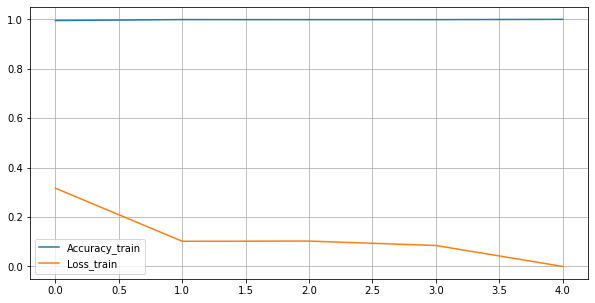

In [21]:
get_train_history(train)

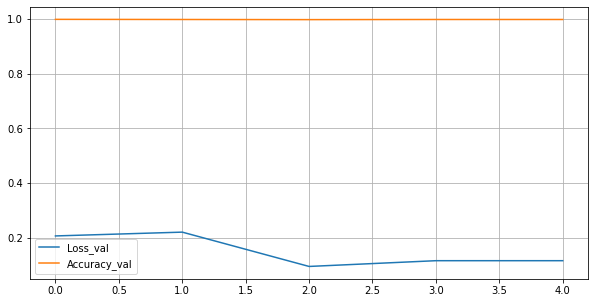

In [22]:
get_train_val_history(train)

In [23]:
evaluate(model5, XtestBin, ytestBin)

Total number of data in the test: 2000
Total numb errors test: 2
Percentage of correct awnsers: 99.9 

[[1000    0]
 [   2  998]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<hr style="border:2px solid black"> </hr>

## Tests for multiclass classification

In [24]:
model5=keras.Sequential()

model5.add(keras.layers.Flatten(input_shape=(28,28)))

model5.add(keras.layers.Dense(128, activation="relu"))
model5.add(keras.layers.Dropout(0.1))    
model5.add(keras.layers.Dense(128, activation="relu"))
model5.add(keras.layers.Dropout(0.1))    
model5.add(keras.layers.Dense(128, activation="relu"))

model5.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
model5.compile(optimizer='nadam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
train = model5.fit(Xtrain, ytrain, epochs=5, validation_data=(Xtest, ytest))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 1.3961 - accuracy: 0.6845 - val_loss: 0.8041 - val_accuracy: 0.7479
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6735 - accuracy: 0.7675 - val_loss: 0.5359 - val_accuracy: 0.8105
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5656 - accuracy: 0.7973 - val_loss: 0.5107 - val_accuracy: 0.8226
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5244 - accuracy: 0.8122 - val_loss: 0.5178 - val_accuracy: 0.8144
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5110 - accuracy: 0.8174 - val_loss: 0.4763 - val_accuracy: 0.8321


In [27]:
evaluate(model5, Xtest, ytest)

Total number of data in the test: 10000
Total numb errors test: 1679
Percentage of correct awnsers: 83.21000000000001 

[[710   4   6 110   0   1 156   0  13   0]
 [  0 961   0  29   1   0   8   0   1   0]
 [  5   1 732  15  67   0 176   0   4   0]
 [  7  13   3 905  22   0  46   1   3   0]
 [  1   1 170  52 591   0 181   0   4   0]
 [  0   0   0   0   0 930   2  39   3  26]
 [116   4  90  68  44   2 659   0  17   0]
 [  0   0   0   0   0  25   0 951   1  23]
 [  0   0   1  12   2   3  25   3 954   0]
 [  0   0   0   0   0  13   0  58   1 928]] 

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1000
           1       0.98      0.96      0.97      1000
           2       0.73      0.73      0.73      1000
           3       0.76      0.91      0.83      1000
           4       0.81      0.59      0.68      1000
           5       0.95      0.93      0.94      1000
           6       0.53      0.66      0.58      1000
           7  

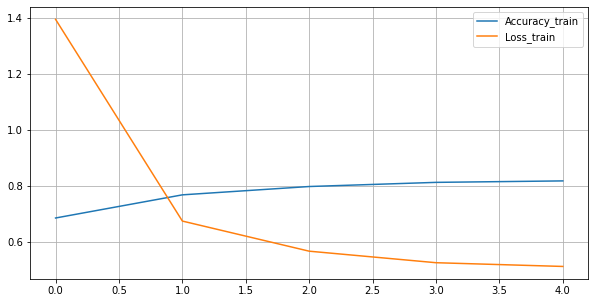

In [28]:
get_train_history(train)